In [1]:
# Importing lib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import os


In [2]:
# Changing current working dir
os.chdir('/content/drive/MyDrive/stats/')

In [22]:
# Loading data into dataframe
df=pd.read_csv('NYC_TAXI_Dataset.csv')

In [23]:
# Dataset overview
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,airport_fee
0,2,2023-04-28 16:48:36,2023-04-28 16:54:09,1.0,0.62,1.0,N,140,141,2,6.5,2.5,0.5,0.00,0.00,1.0,13.00,2.5,0.0,NaN
1,2,2023-04-23 03:36:53,2023-04-23 04:04:12,1.0,10.82,1.0,N,148,67,2,45.7,1.0,0.5,0.00,0.00,1.0,50.70,2.5,0.0,NaN
2,2,2023-04-15 17:37:42,2023-04-15 17:51:00,1.0,1.03,1.0,N,90,79,1,12.8,0.0,0.5,3.36,0.00,1.0,20.16,2.5,0.0,NaN
3,1,2023-04-10 11:15:19,2023-04-10 11:25:42,1.0,1.60,1.0,N,162,140,1,11.4,2.5,0.0,3.00,0.00,1.0,17.90,2.5,0.0,NaN
4,2,2023-04-25 14:11:48,2023-04-25 15:12:14,1.0,17.05,2.0,N,100,132,2,70.0,0.0,0.5,0.00,6.55,1.0,80.55,2.5,0.0,NaN


In [24]:
# Droping airport_fee column and null values
df=df.drop('airport_fee',axis=1)
df=df.dropna()

In [25]:
# Dataset shape and info
print('Dataset Shape:',df.shape)
print(df.info())

Dataset Shape: (650000, 19)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 650000 entries, 0 to 649999
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               650000 non-null  int64  
 1   tpep_pickup_datetime   650000 non-null  object 
 2   tpep_dropoff_datetime  650000 non-null  object 
 3   passenger_count        650000 non-null  float64
 4   trip_distance          650000 non-null  float64
 5   RatecodeID             650000 non-null  float64
 6   store_and_fwd_flag     650000 non-null  object 
 7   PULocationID           650000 non-null  int64  
 8   DOLocationID           650000 non-null  int64  
 9   payment_type           650000 non-null  int64  
 10  fare_amount            650000 non-null  float64
 11  extra                  650000 non-null  float64
 12  mta_tax                650000 non-null  float64
 13  tip_amount             650000 non-null  float64
 14  tolls_am

In [26]:
# Checking for duplicate and null values
print(df.duplicated().sum())
print(df.isnull().sum())

0
VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
Airport_fee              0
dtype: int64


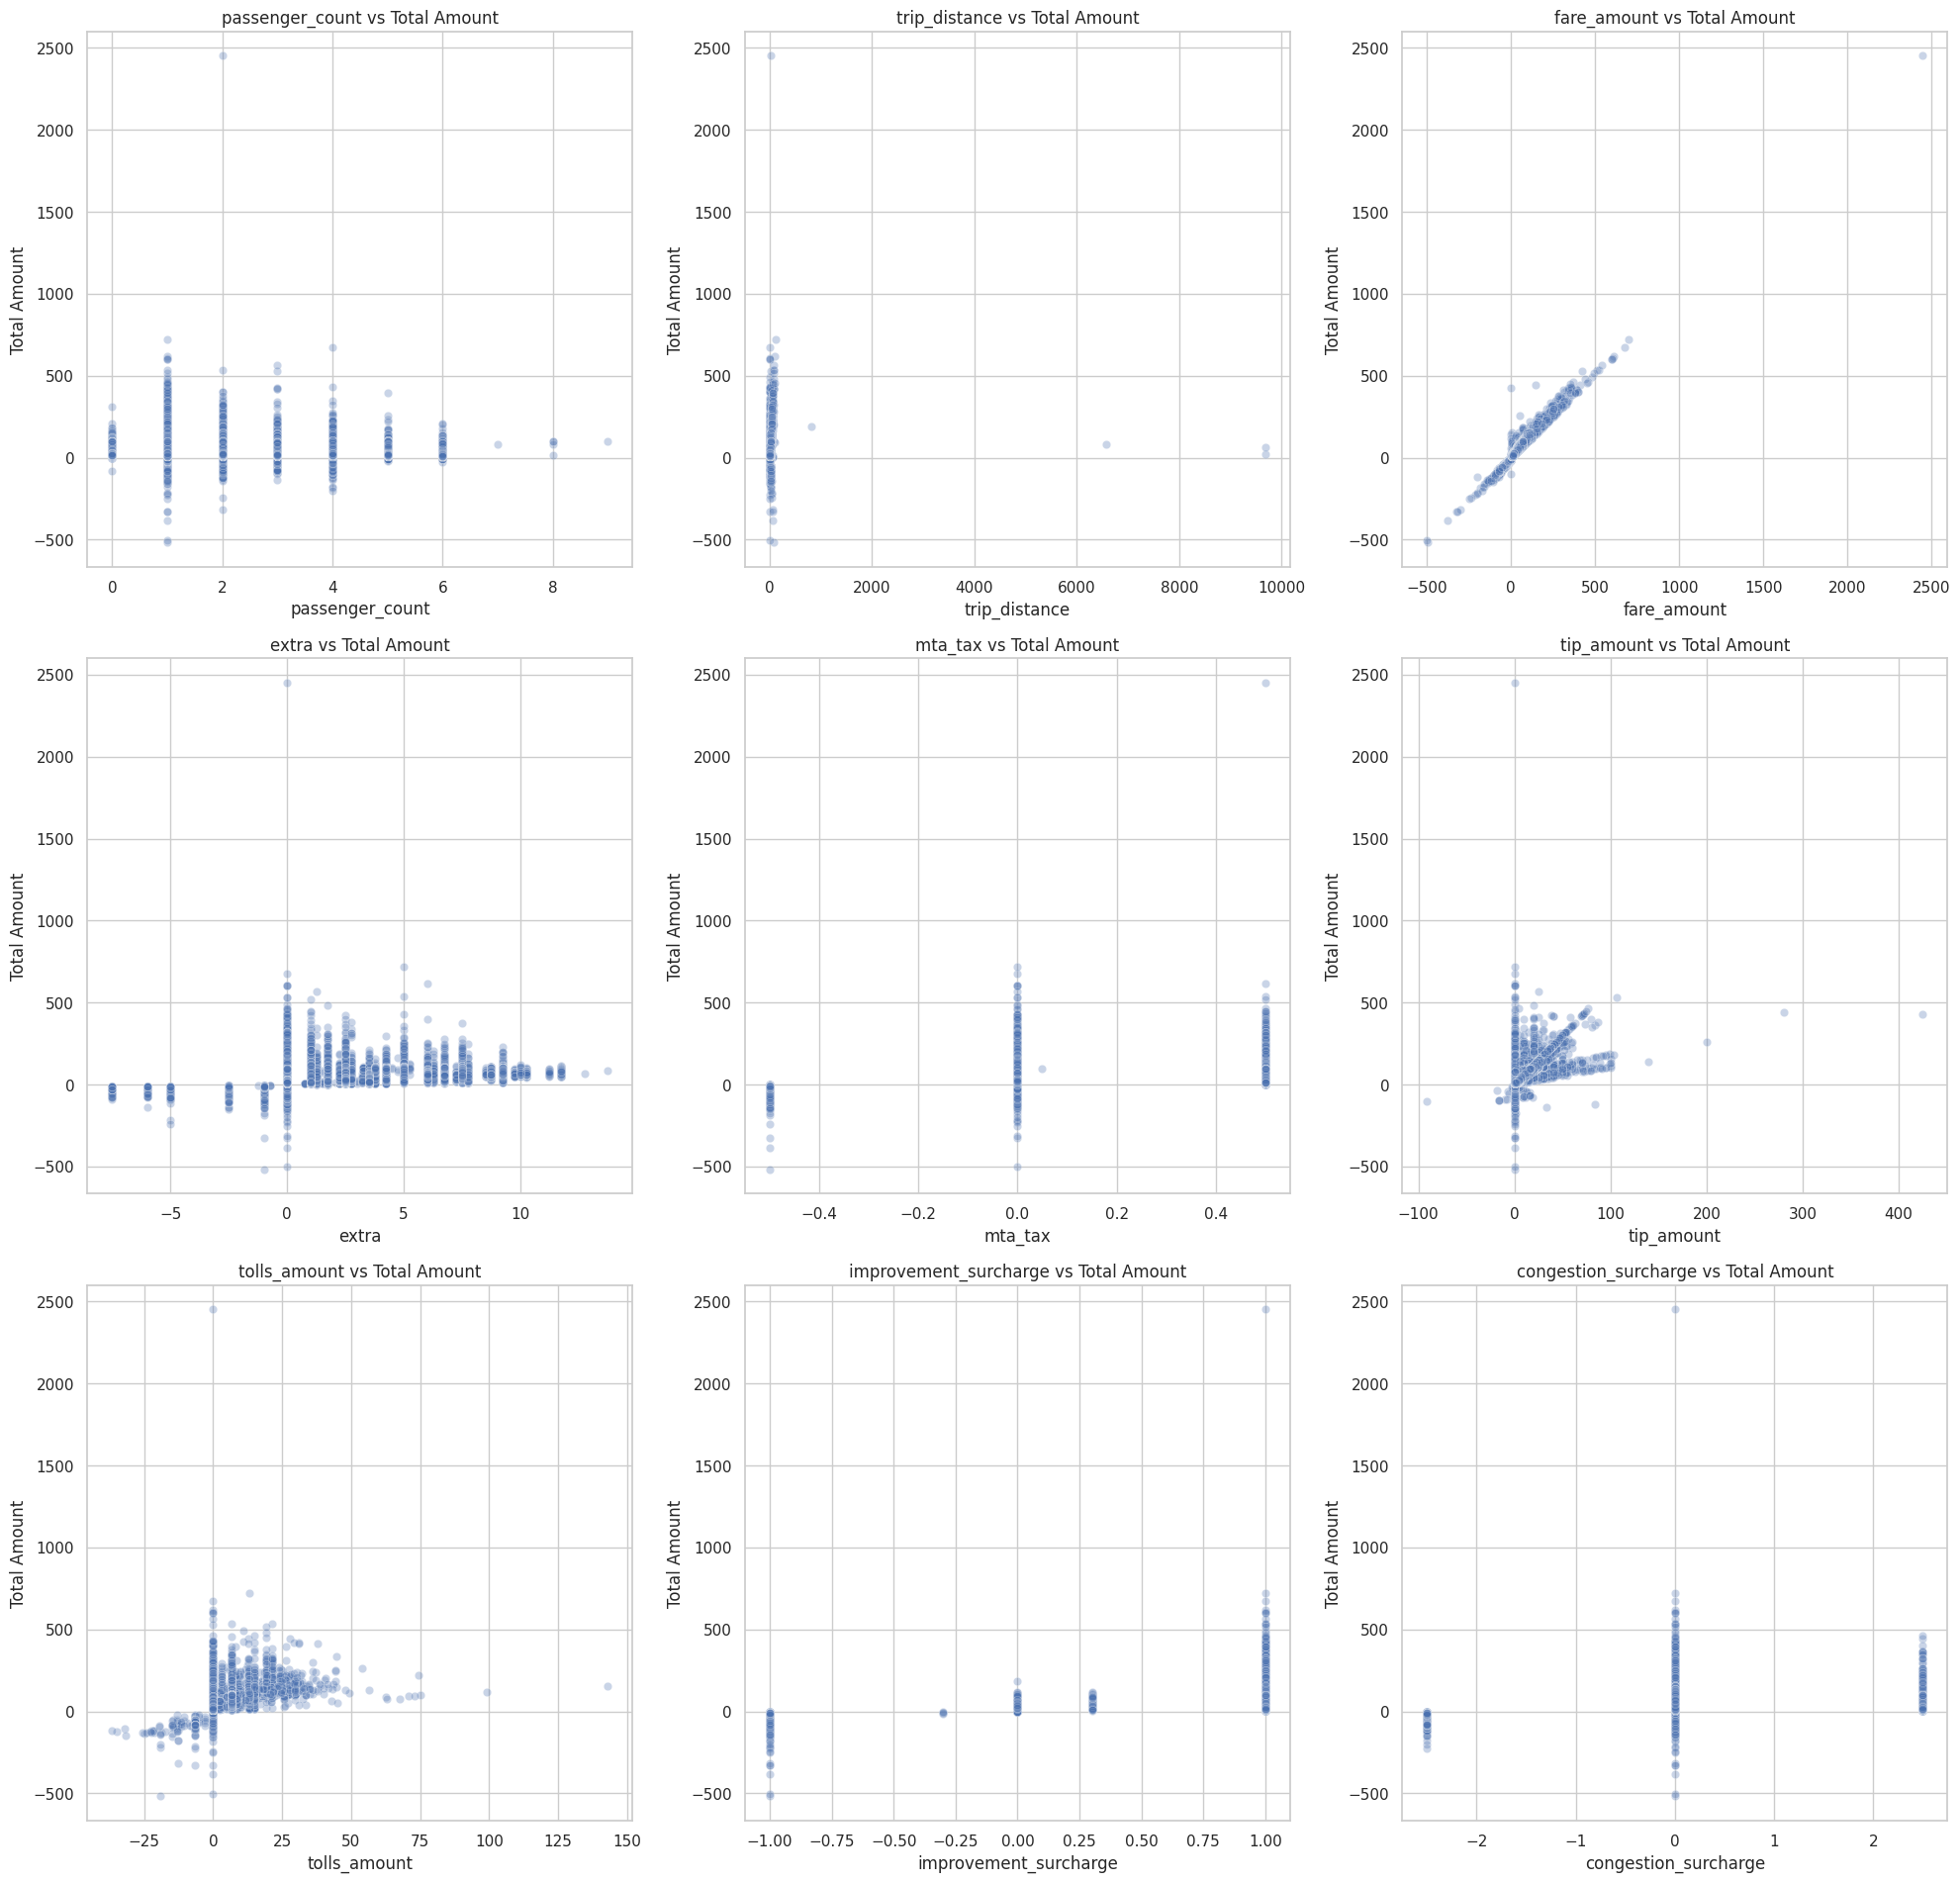

In [42]:
# Scatter plot to show relationship between all the features and Response( Total_Amount)
plt.figure(figsize=(20, 25))
numeric_features = [
    'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
    'tip_amount', 'tolls_amount', 'improvement_surcharge', 'congestion_surcharge'
]

for i, feature in enumerate(numeric_features):
    plt.subplot(4, 3, i+1)
    sns.scatterplot(data=df, x=feature, y='total_amount', alpha=0.3)
    plt.title(f'{feature} vs Total Amount')
    plt.xlabel(feature)
    plt.ylabel('Total Amount')

plt.tight_layout()
plt.show()


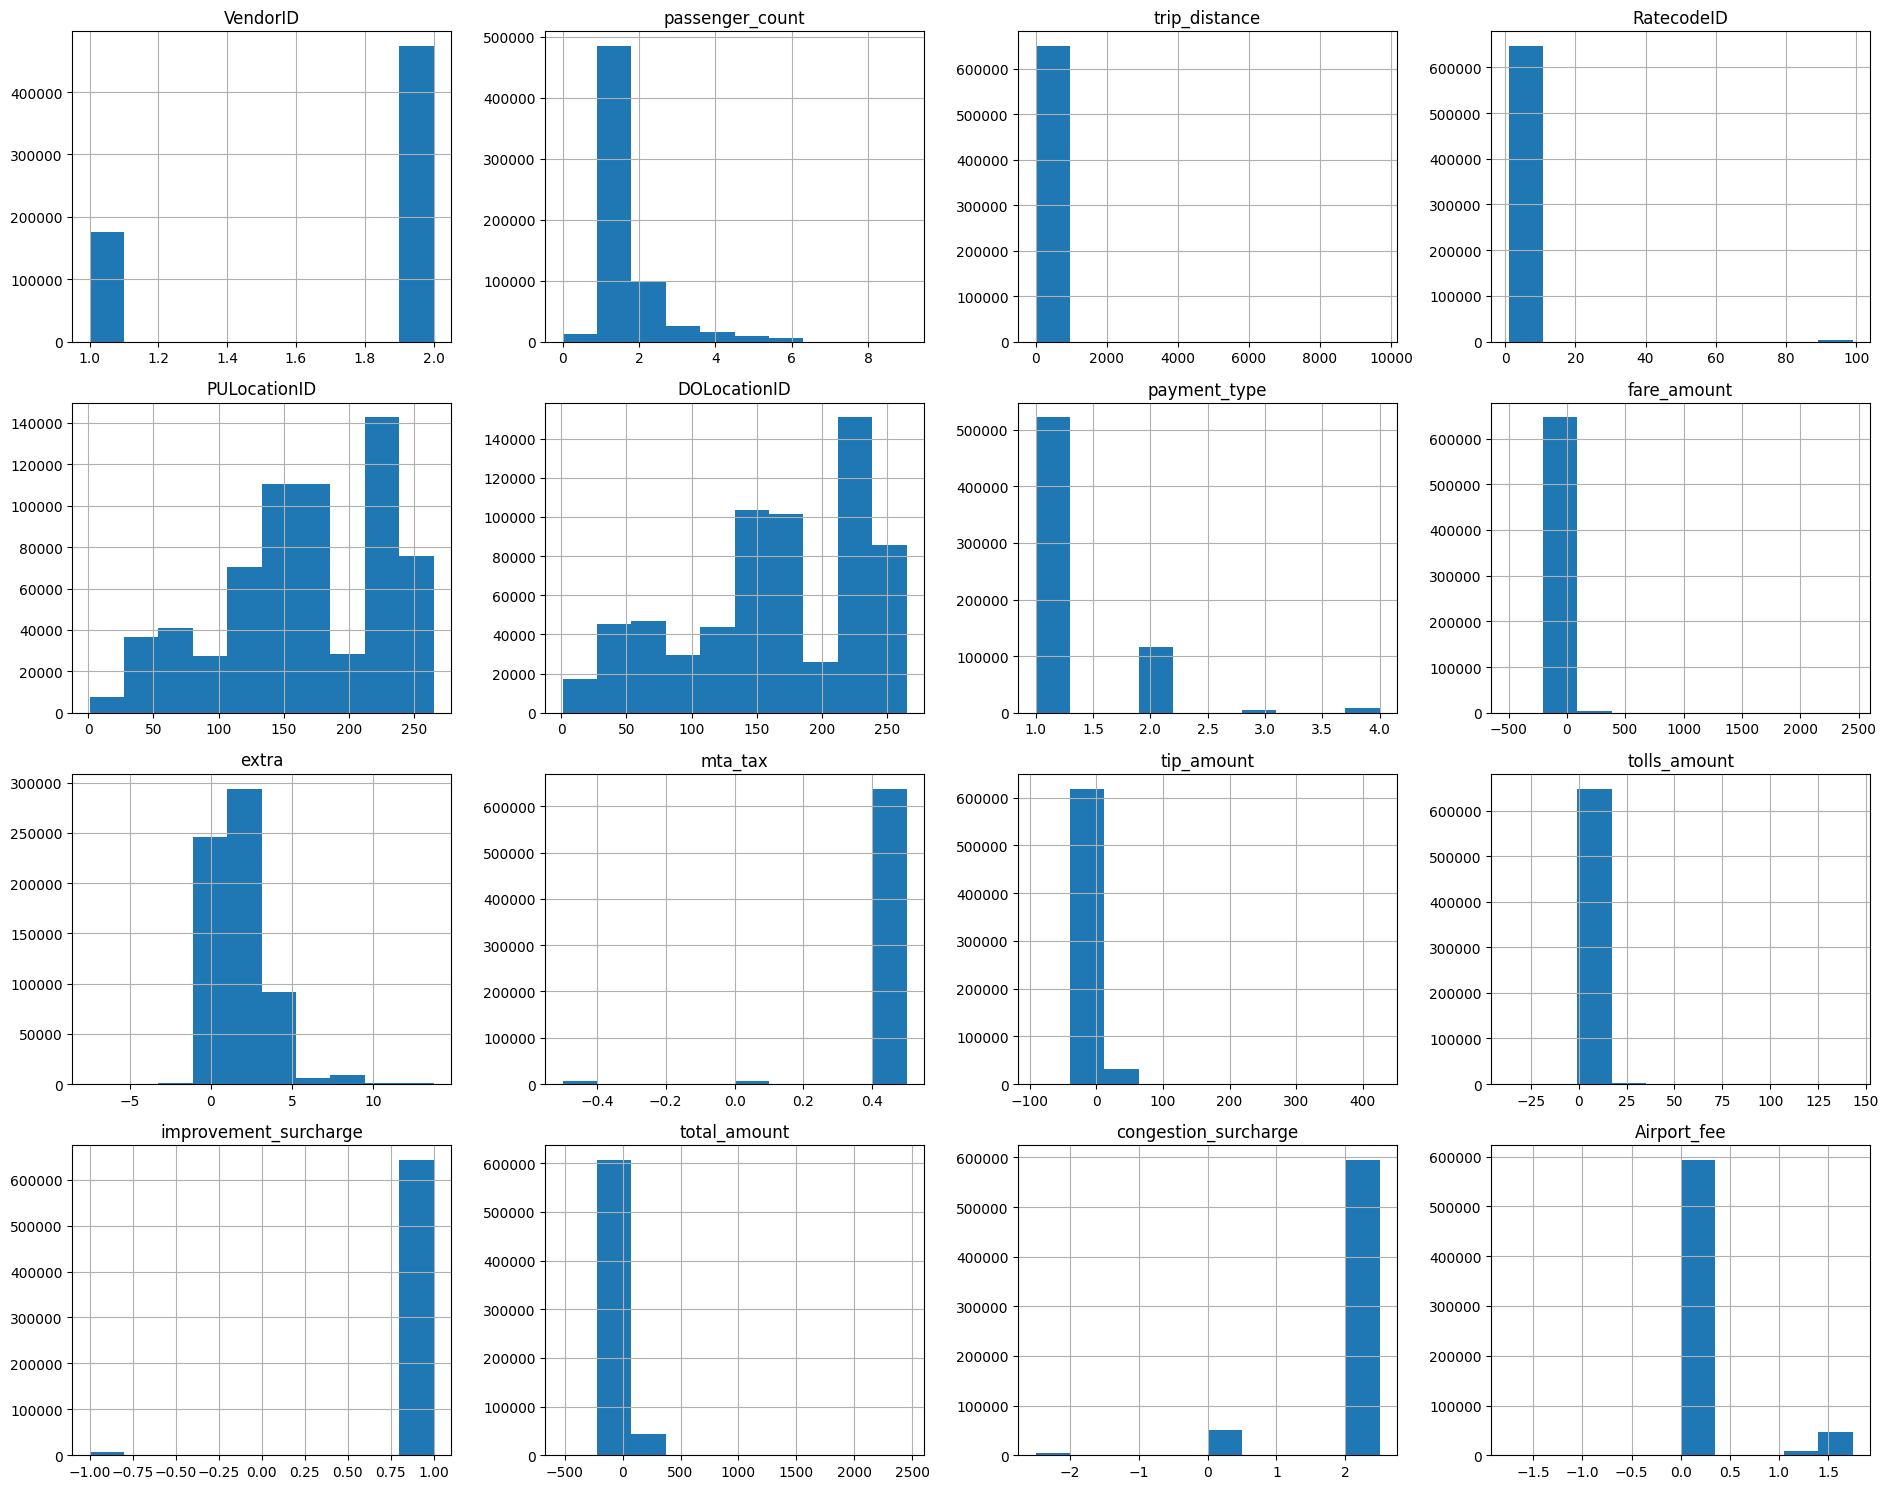

In [27]:
# Histograms to see distribution and skewness of dataset
df.hist(figsize=(19, 15))
plt.tight_layout()
plt.show()

In [ ]:
# Select only numeric columns
df_numeric = df.select_dtypes(include=['float64', 'int64'])

# Plot all numeric columns as boxplots in a grid layout
df_numeric.plot.box(subplots=True, layout=(4, 5), figsize=(20, 15))

plt.suptitle("Boxplots of Numerical Features", fontsize=16)
plt.tight_layout()
plt.show()

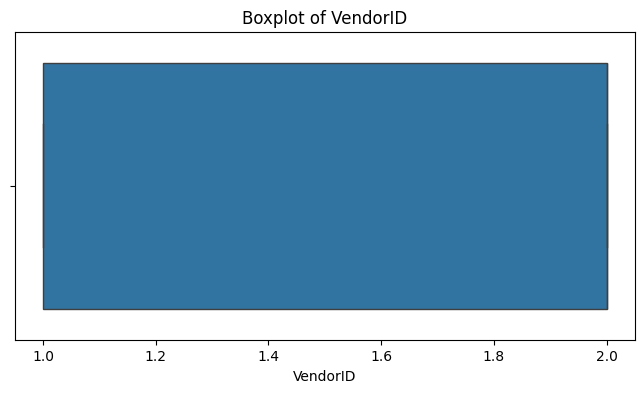

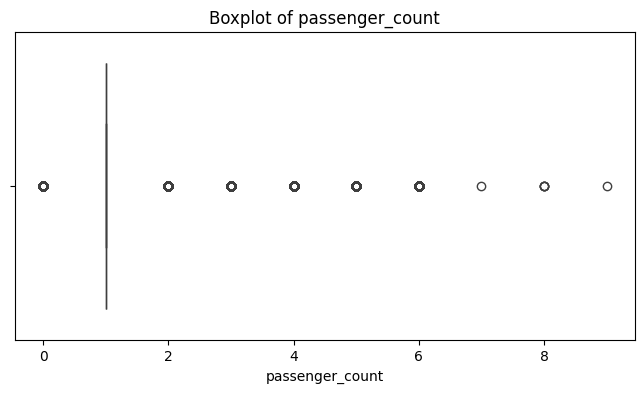

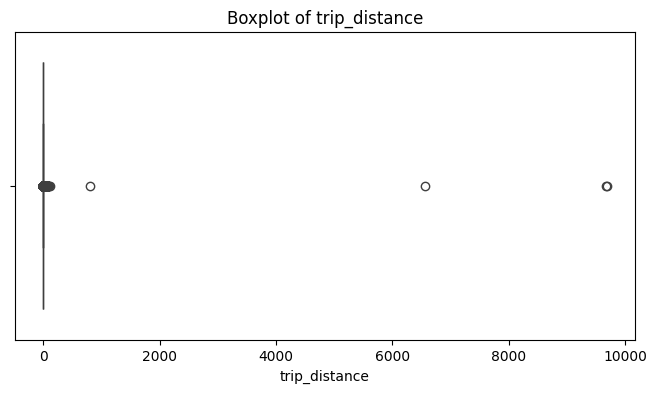

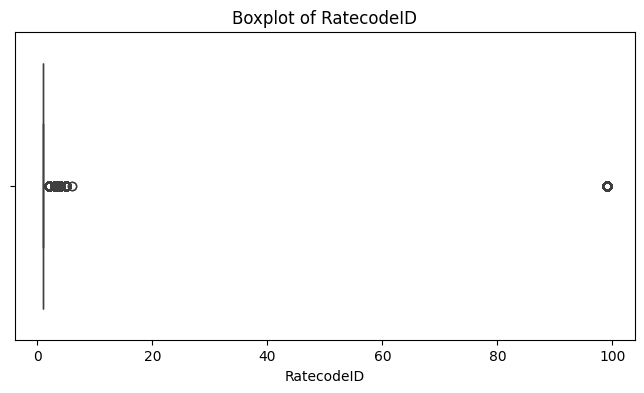

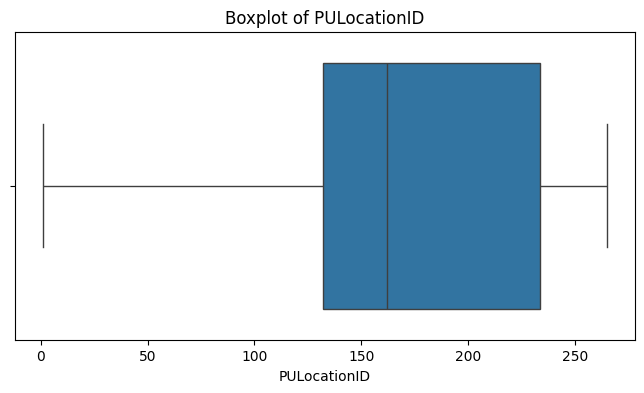

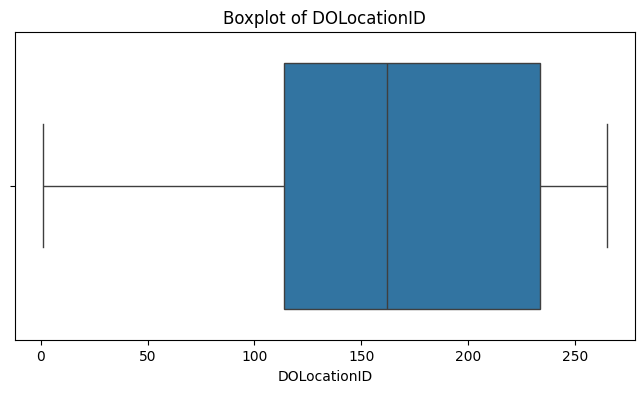

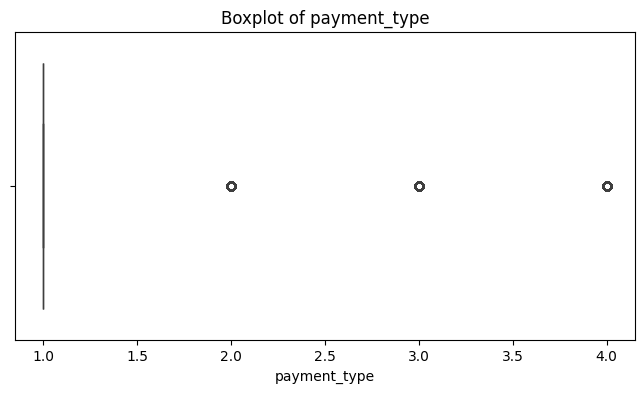

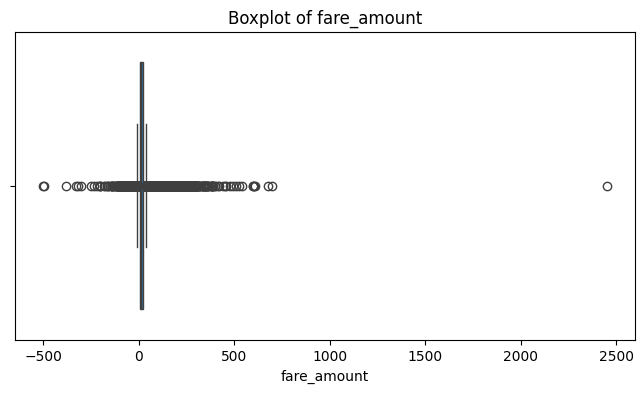

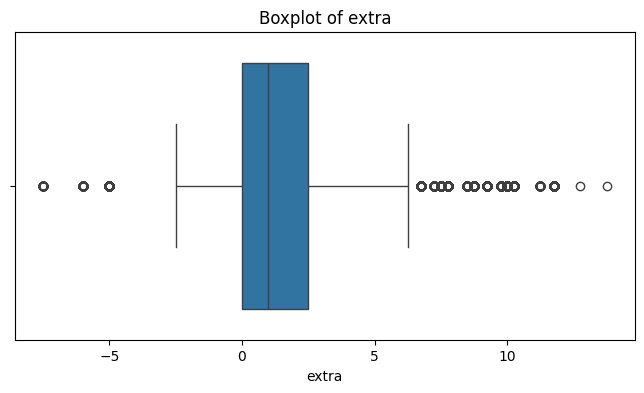

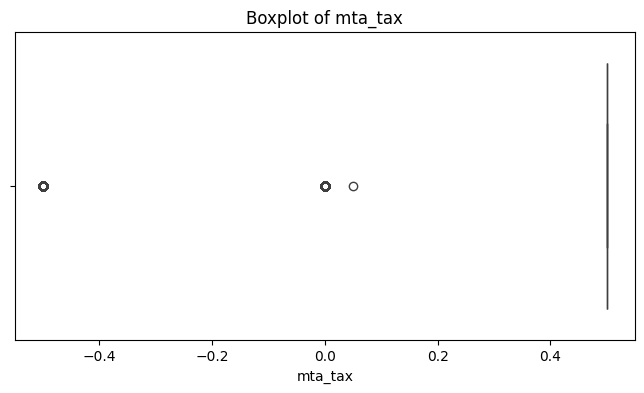

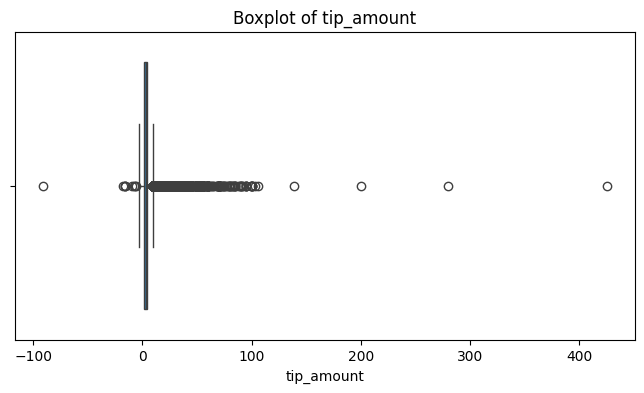

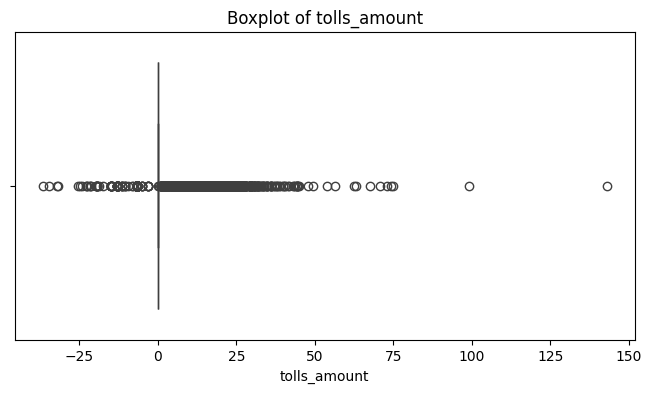

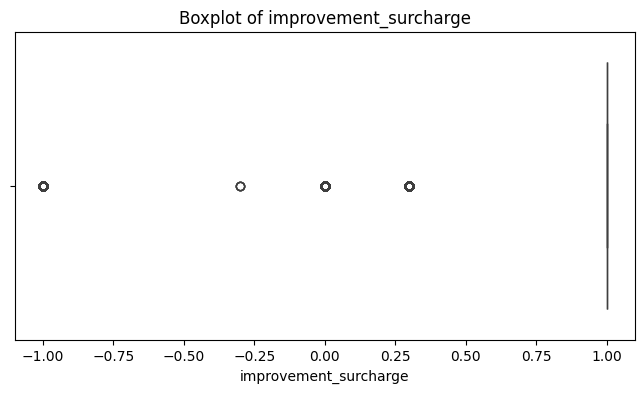

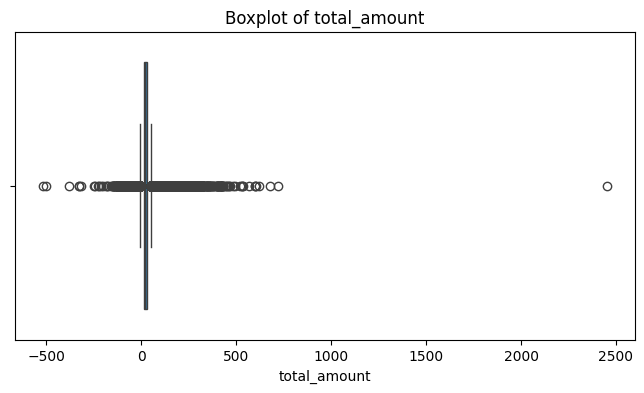

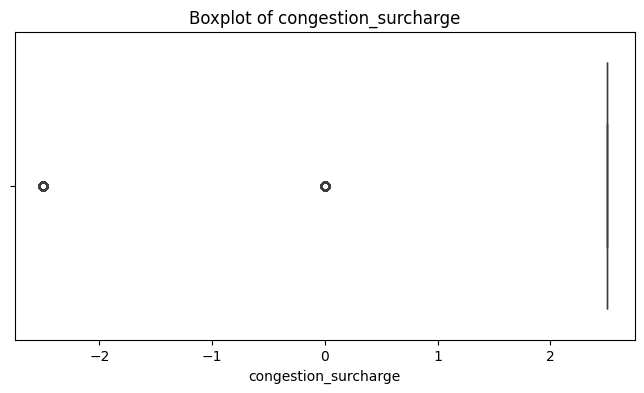

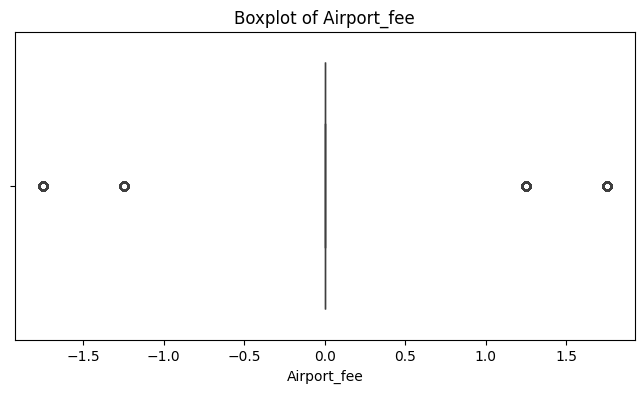

In [28]:
# Box plot to delect outliers and anomalies
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

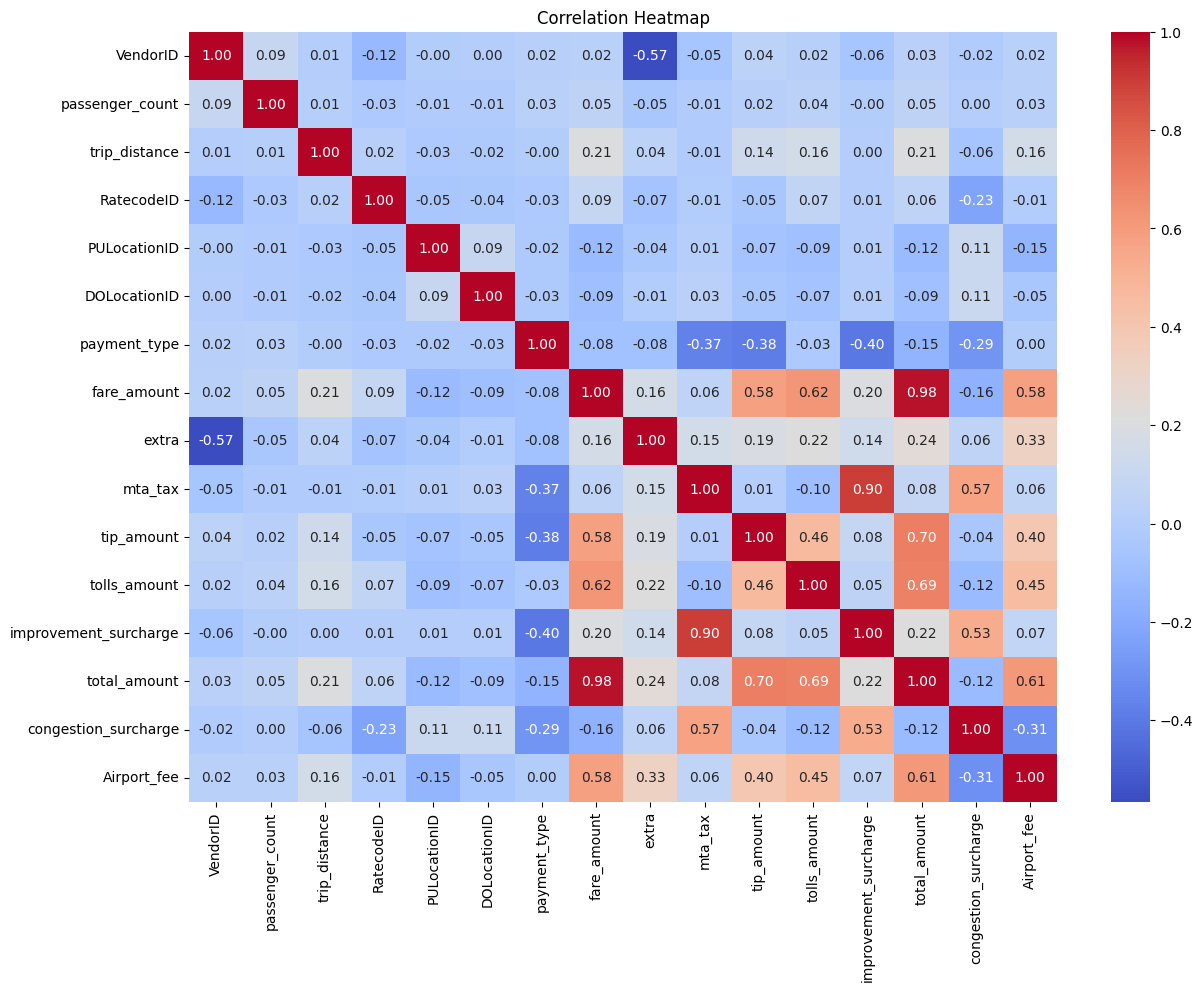

In [29]:
# Heatmap to check Multi_colinearity between all the features
df_numeric = df.select_dtypes(include='number')
plt.figure(figsize=(14, 10))
sns.heatmap(df_numeric.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [30]:
# Converting from object to datetime type
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

# Encoding categorical feature to binary numerical
df['store_and_fwd_flag'] = df['store_and_fwd_flag'].map({'N': 0, 'Y': 1})


In [31]:
# Adding new features calculated using date and time
df['trip_duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
df['pickup_dayofweek'] = df['tpep_pickup_datetime'].dt.dayofweek


In [32]:
# Removing date and time columns
df = df.drop(columns=['tpep_pickup_datetime', 'tpep_dropoff_datetime'])

In [51]:
df.head()

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,trip_duration,pickup_hour,pickup_dayofweek
0,2,1.0,0.62,1.0,0,140,141,2,6.5,2.5,0.5,0.00,0.00,1.0,13.00,2.5,5.550000,16,4
1,2,1.0,10.82,1.0,0,148,67,2,45.7,1.0,0.5,0.00,0.00,1.0,50.70,2.5,27.316667,3,6
2,2,1.0,1.03,1.0,0,90,79,1,12.8,0.0,0.5,3.36,0.00,1.0,20.16,2.5,13.300000,17,5
3,1,1.0,1.60,1.0,0,162,140,1,11.4,2.5,0.0,3.00,0.00,1.0,17.90,2.5,10.383333,11,0
4,2,1.0,17.05,2.0,0,100,132,2,70.0,0.0,0.5,0.00,6.55,1.0,80.55,2.5,60.433333,14,1


In [56]:
# Creating Feature and Response set and droping leaky columns
X = df.drop(columns=['VendorID','total_amount', 'fare_amount', 'tip_amount',
                     'tolls_amount', 'mta_tax', 'extra',
                     'improvement_surcharge', 'congestion_surcharge'])

y = df['total_amount']


In [64]:
# Final dataset features for model
X.head()

,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,trip_duration,pickup_hour,pickup_dayofweek
0,1.0,0.62,1.0,0,140,141,2,5.550000,16,4
1,1.0,10.82,1.0,0,148,67,2,27.316667,3,6
2,1.0,1.03,1.0,0,90,79,1,13.300000,17,5
3,1.0,1.60,1.0,0,162,140,1,10.383333,11,0
4,1.0,17.05,2.0,0,100,132,2,60.433333,14,1


In [57]:
# Scaling feature values to minimize distortion effect of feature magnitude
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [58]:
# Splitting dataset into training and test data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [61]:
# Hyper parameter tunning for Decision Tree using gridsearchcv and cross validation using cv=3
dt_model = DecisionTreeRegressor(random_state=42)
dt_param_grid = {
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

dt_grid = GridSearchCV(dt_model, dt_param_grid, cv=3, scoring='neg_mean_squared_error')
dt_grid.fit(X_train, y_train)

print("Best Parameters (Decision Tree):", dt_grid.best_params_)
print("Best Score (Negative MSE):", dt_grid.best_score_)

In [45]:
# Hyper parameter tunning for Random Forest using gridsearchcv and cross validation using cv=3
rf_model = RandomForestRegressor(random_state=42)
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None]
}

rf_grid = GridSearchCV(rf_model, rf_param_grid, cv=3, scoring='neg_mean_squared_error')
rf_grid.fit(X_train, y_train)

print("Best Parameters (Random Forest):", rf_grid.best_params_)
print("Best Score (Negative MSE):", rf_grid.best_score_)

In [63]:
# Creating Three ReGression models( Linear Regression, Decision Tree, Random forest) and comparing their accuracy using RMSE,MAE, R2 Score
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(criterion='squared_error',max_depth=8,min_samples_leaf=10,min_samples_split=10),
    "Random Forest": RandomForestRegressor(n_estimators=50,max_depth=10, random_state=42)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    print(f"{name}:")
    print(f"  RMSE: {np.sqrt(mean_squared_error(y_test, preds))}")
    print(f"  MAE: {mean_absolute_error(y_test, preds)}")
    print(f"  R2 Score: {r2_score(y_test, preds)}")
    print()


Linear Regression:
  RMSE: 21.81
  MAE: 13.60
  R2 Score: 0.16

Decision Tree:
  RMSE: 8.83
  MAE: 3.16
  R2 Score: 0.86

Random Forest:
  RMSE: 8.65
  MAE: 2.69
  R2 Score: 0.87



# Conclusion: Out of the three models — Linear Regression, Decision Tree, and Random Forest — the Random Forest performed best with an R² score of 0.87, the lowest RMSE (8.65), and the lowest MAE (2.69). Linear Regression underperformed with an R² of 0.16, indicating poor fit. Decision Tree performed better (R² = 0.86) but was slightly less accurate than Random Forest.
#Therefore, we select Random Forest as our final model for predicting total_amount.